# Google Colab Admin

In [3]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize

import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn't guaranteed
gpu = GPUs[0]

def printm():
  process = psutil.Process(os.getpid())
  print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " I Proc size: " + humanize.naturalsize( process.memory_info().rss))
  print('GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB'.format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))

printm()

Gen RAM Free: 12.9 GB  I Proc size: 136.9 MB
GPU RAM Free: 11441MB | Used: 0MB | Util   0% | Total 11441MB


In [2]:
!pip install PyDrive
!pip install keras --upgrade
!pip install matplotlib --upgrade
!pip install librosa
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os

    100% |████████████████████████████████| 993kB 12.2MB/s 
  Running setup.py bdist_wheel for PyDrive ... - \ done
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive
Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.2.4)
    100% |████████████████████████████████| 12.9MB 2.3MB/s 
    100% |████████████████████████████████| 952kB 17.0MB/s 
  Found existing installation: matplotlib 2.1.2
    Uninstalling matplotlib-2.1.2:
      Successfully uninstalled matplotlib-2.1.2
    100% |████████████████████████████████| 1.6MB 9.9MB/s 
    100% |████████████████████████████████| 327kB 13.6MB/s 
    100% |████████████████████████████████| 3.2MB 9.4MB/s 
    100% |████████████████████████████████| 16.1MB 2.5MB/s 
  Running setup.py bdist_wheel for librosa ... - \ done
  Stored in directory: /root/.cache/pip/wheels/18/b8/10/f0f8f6ac60668a5cd75596cf14c25bb6b3ea1ecd815f058b7e
  

In [0]:
# authorise google SDK to use drive

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# from the shareable link on google, get the id and paste like this

# get annotations file
download = drive.CreateFile({'id':'1XHHRjyRyq1wNnmaP6ZRn7c12qID9J-M9'})
download.GetContentFile('Annotations.zip')

# get signals file
download = drive.CreateFile({'id':'17JL1xg5wNnl8ck8VqYsvpABxdAIrdlBi'})
download.GetContentFile('Signals.zip')

In [0]:
# open the zipfiles

import zipfile

zip_ref = zipfile.ZipFile('Annotations.zip', 'r')
zip_ref.extractall()
zip_ref.close()

zip_ref = zipfile.ZipFile('Signals.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [0]:
!mkdir Annotations
!mkdir Signals

!bash -c 'mv Annotation\ 1.wav Annotations'
!bash -c 'mv Annotation\ 2.wav Annotations'
!bash -c 'mv Annotation\ 3.wav Annotations'
!bash -c 'mv Annotation\ 4.wav Annotations'
!bash -c 'mv Annotation\ 5.wav Annotations'
!bash -c 'mv Annotation\ 6.wav Annotations'
!bash -c 'mv Annotation\ 7.wav Annotations'
!bash -c 'mv Annotation\ 8.wav Annotations'
!bash -c 'mv Annotation\ 9.wav Annotations'
!bash -c 'mv Annotation\ 10.wav Annotations'

!bash -c 'mv Signal\ 1.wav Signals'
!bash -c 'mv Signal\ 2.wav Signals'
!bash -c 'mv Signal\ 3.wav Signals'
!bash -c 'mv Signal\ 4.wav Signals'
!bash -c 'mv Signal\ 5.wav Signals'
!bash -c 'mv Signal\ 6.wav Signals'
!bash -c 'mv Signal\ 7.wav Signals'
!bash -c 'mv Signal\ 8.wav Signals'
!bash -c 'mv Signal\ 9.wav Signals'
!bash -c 'mv Signal\ 10.wav Signals'

# Import Audio Files

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3122: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3128: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')


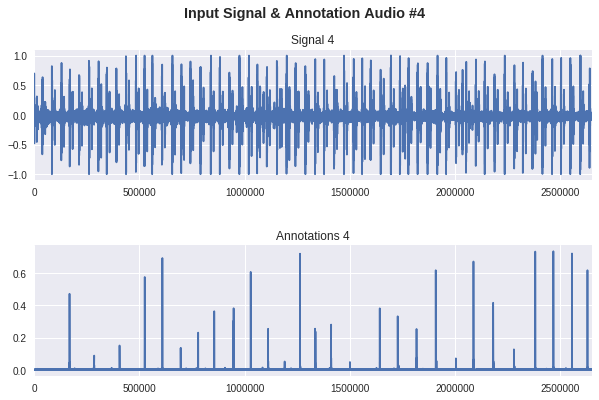

[0 0 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3455: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


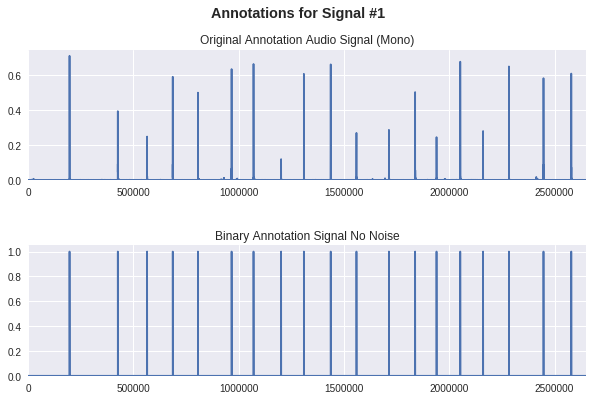

In [2]:
''' IMPORT AUDIO SIGNALS '''

# Write signal data to variables
from scipy.io import wavfile
import wave
import numpy as np
samprate = 44100

def get_wav(file_name, nsamples):
    wav = wavfile.read(file_name)[1]
    signal = wav[0:nsamples]
    return signal

# work out length of each sample in frames
sampleframes = []
for i in range(1,11):
    sample = wave.open("Signals/Signal {}.wav".format(i),'r')
    nframes = sample.getnframes()
    sampleframes.append(nframes)
    
# import signals and store
signals = [get_wav("Signals/Signal {}.wav".format(i+1),sampleframes[i]*2) for i in range(10)]
    
# create list of second intervals for each sample
samplesecs = [np.arange(1,len(signals[i])+1) / samprate for i in range(10)]




''' IMPORT ANNOTATION AUDIO SIGNALS '''

# work out length of each sample in frames
annotationframes = []
for i in range(1,11):
    sample = wave.open("Annotations/Annotation {}.wav".format(i),'r')
    nframes = sample.getnframes()
    annotationframes.append(nframes)
    
# import signals and store
annotations = [get_wav("Annotations/Annotation {}.wav".format(i+1),annotationframes[i]*2) for i in range(10)]



''' NORMALIZE SIGNALS TO 1 '''

# Normalize signals
for i in range(len(signals)):
    signals[i] = signals[i] / (2.**15)

for i in range(len(annotations)):
    annotations[i] = annotations[i] / (2.**15)  
    
    
    
    
''' CUT SIGNALS TO SAME LENGTH '''

# 2,650,000 is the right length based on eye-balling the data
# need to automate this
for i in range(len(signals)):
    signals[i] = signals[i][0:2650000]

for i in range(len(signals)):
    annotations[i] = annotations[i][0:2650000]

# test to ensure lengths are the same
for i in range(len(signals)):
    assert len(signals[i]) == len(annotations[i])

    

    
''' MAKE SIGNALS & ANNOTATIONS MONO '''

# select only one channel of stereo signal, and transpose ready for melspectogram
signals_mono = [signals[i].T[0] for i in range(len(signals))]

# make annotations one channel, transposed, absolute
annotations_mono = [abs(annotations[i].T[0]) for i in range(len(annotations))]




''' VISUALISE '''

import matplotlib.pyplot as plt

signal_num = 4  # set which signal you want to see

fig, axs = plt.subplots(2,1,figsize=(10,6))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Input Signal & Annotation Audio #{}'.format(signal_num),weight='bold')

axs[0].plot(signals_mono[signal_num])
axs[0].set_xlim(xmin=0,xmax=len(signals_mono[signal_num]))
axs[0].set_title('Signal {}'.format(signal_num))
axs[0].spines['top'].set_color('none')
axs[0].spines['right'].set_color('none')

axs[1].plot(annotations_mono[signal_num])
axs[1].set_xlim(xmin=0,xmax=len(annotations_mono[signal_num]))
axs[1].set_title('Annotations {}'.format(signal_num))
axs[1].spines['top'].set_color('none')
axs[1].spines['right'].set_color('none')

plt.show()
plt.close()




''' GLOBAL VARIABLES FOR REFERENCE '''

# known clicks per sample
originalclickspersignal = {
        'Annotation 1' : 24, 'Annotation 2' : 20, 'Annotation 3' : 24, 'Annotation 4' : 34, 'Annotation 5' : 30,
        'Annotation 6' : 31, 'Annotation 7' : 32, 'Annotation 8' : 36, 'Annotation 9' : 33, 'Annotation 10' : 29}

# these are number of clicks per sample after chopping data
newclickspersignal = {
        'Annotation 1' : 22, 'Annotation 2' : 19, 'Annotation 3' : 22, 'Annotation 4' : 33, 'Annotation 5' : 28,
        'Annotation 6' : 30, 'Annotation 7' : 31, 'Annotation 8' : 29, 'Annotation 9' : 29, 'Annotation 10' : 26}

# eye-balled thresholds for each signal
thresholds = {
        'Annotation 1' : 0.1, 'Annotation 2' : 0.1, 'Annotation 3' : 0.07, 'Annotation 4' : 0.1, 'Annotation 5' : 0.03,
        'Annotation 6' : 0.1, 'Annotation 7' : 0.095, 'Annotation 8' : 0.1, 'Annotation 9' : 0.05, 'Annotation 10' : 0.1}




''' TURN ANNOTATIONS INTO BINARY SIGNAL '''

# denote whenever amplitude is above threshold
anno_gates = []
for i in range(len(annotations_mono)):
    gate_list = []
    for j in range(len(annotations_mono[i])):
        if annotations_mono[i][j] > thresholds['Annotation {}'.format(i+1)]: # this is amplitude threshold
            x = 1
        else:
            x = 0
        gate_list.append(x)
    anno_gates.append(gate_list)
    

    

''' SUPRESS NOISE IN BINARY ANNOTATIONS '''

# ensure noise is removed so there's exact number of clicks
fwd_frame_thresh = 15000

size_anno_gates = []
for i in range(len(anno_gates)):
    for j in range(len(anno_gates[i])):
        if anno_gates[i][j] == 1:
            for k in range(1,fwd_frame_thresh): # this is the forward threshold for silencing frames
                if j+k < len(anno_gates[i]):
                    anno_gates[i][j+k] = 0
                else:
                    k = fwd_frame_thresh - j
                    anno_gates[i][j+k] = 0       
    size_anno_gates.append(sum(anno_gates[i]))

print(np.r_[list(newclickspersignal.values())] - np.r_[size_anno_gates])




''' VISUALISE ANNOTATION MONO & ANNOTATION BINARY '''

signal_num = 1

fig, axs = plt.subplots(2,1,figsize=(10,6))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Annotations for Signal #{}'.format(signal_num),weight='bold')

axs[0].plot(annotations_mono[signal_num])
axs[0].set_title('Original Annotation Audio Signal (Mono)')
axs[0].set_xlim(xmin=0,xmax=len(annotations_mono[signal_num]))
axs[0].set_ylim(ymin=0)
axs[0].spines['top'].set_color('none')
axs[0].spines['right'].set_color('none')

axs[1].plot(anno_gates[signal_num])
axs[1].set_title('Binary Annotation Signal No Noise')
axs[1].set_xlim(xmin=0,xmax=len(anno_gates[signal_num]))
axs[1].set_ylim(ymin=0)
axs[1].spines['top'].set_color('none')
axs[1].spines['right'].set_color('none')

plt.show()
plt.close()

# Mel Spectrograms & Labels

Shape of mel spectrograms = (75, 6448, 3)


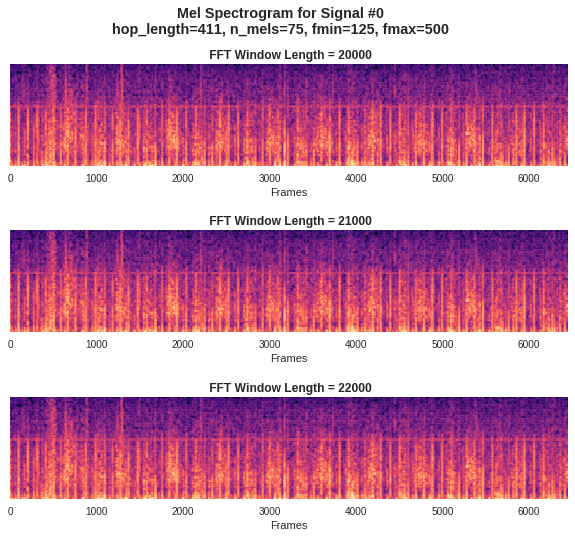

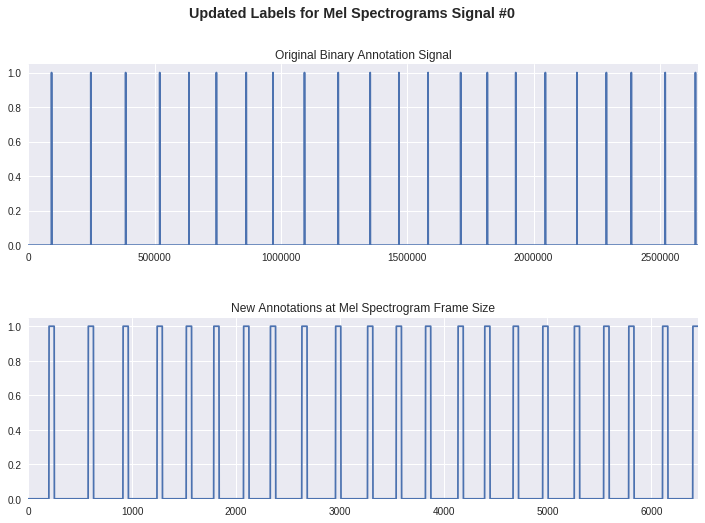

In [3]:
''' IMPORTS & GLOBALS '''

import librosa
from librosa.display import specshow
from librosa.feature import melspectrogram
import pylab
import warnings
warnings.filterwarnings('ignore')



''' GENERATE MEL SPECTOGRAMS FOR SIGNALS '''

hop_length = 411  # number of frames to jump when computing fft
fmin = 125  # bottom frequency to look at
fmax = 500  # top frequency to look at
n_mels = 75  # number of audio frequency bins
n_fft = [20000, 21000, 22000]  # width of the fft windows

# list of 10 mels, with depth 3
mel_db_list = []
for i in range(len(signals_mono)):    
    # create 3 mel spectrograms with different fft window size, all other variables the same
    mel = [melspectrogram(signals_mono[i], sr=samprate, hop_length=hop_length, n_fft=j, n_mels=n_mels, fmin=fmin, fmax=fmax) for j in n_fft]
    # turn spectrograms into log values
    mel_db = [librosa.power_to_db(mel[k],ref=np.max) for k in range(len(mel))]
    # re-stack these spectrograms into a single array
    mel_db = np.stack(mel_db,axis=-1)
    # put all spectrograms into a single list
    mel_db_list.append(mel_db)

print('Shape of mel spectrograms = '+str(mel_db_list[0].shape))



''' VISUALISE MEL SPECTROGRAMS FOR ONE SIGNAL '''

signal_num = 0

plt.figure(figsize=(10,8))
plt.subplots_adjust(hspace=0.63)
plt.suptitle('Mel Spectrogram for Signal #{}\nhop_length={}, n_mels={}, fmin={}, fmax={}'.format(signal_num,hop_length,n_mels,fmin,fmax),weight='bold')

for i in range(len(n_fft)):
    plt.subplot(3,1,i+1)
    plt.title(' FFT Window Length = {}'.format(n_fft[i]),weight='bold')
    specshow(mel_db_list[signal_num][:,:,i],sr=samprate,x_axis='frames')
plt.show()
plt.close()



''' REDUCE ANNOTATIONS TO LENGTH OF MEL SPECTROGRAM '''

# set the search window and hop size to same as the melspectrogram
hop_size = hop_length
search_window = n_fft[1]

# find index points to look at in annotation signal
indices = list(np.arange(0,len(anno_gates[0]),hop_length))

# now look across the annotation signal and max if there's a 1 in the window frame
labels_list = []
for i in range(len(anno_gates)):
    labels = []
    
    for j in indices:    
        if ((j - search_window/2) > 0) & ((j + search_window/2) < len(anno_gates[i])):
            label_window = anno_gates[i][int(j-search_window/2):int(j+search_window/2)]
            max_label = max(label_window)
            labels.append(max_label)
        
        elif (j - search_window/2) < 0:
            label_window = anno_gates[i][0:int(j+search_window/2)]
            max_label = max(label_window)
            labels.append(max_label)
        
        elif (j + search_window/2) > len(anno_gates[i]):
            label_window = anno_gates[i][int(j-search_window/2):len(anno_gates[i])]
            max_label = max(label_window)
            labels.append(max_label)
    
    labels_list.append(labels)
    
    

''' VISUALISE BINARY SIGNAL AND MEL SIZED ANNOTATIONS '''

signal_num = 0

fig,axs = plt.subplots(2,1,figsize=(12,8))
plt.subplots_adjust(hspace=0.4)
plt.suptitle('Updated Labels for Mel Spectrograms Signal #{}'.format(signal_num),weight='bold')

axs[0].plot(anno_gates[signal_num])
axs[0].set_title('Original Binary Annotation Signal')
axs[0].set_xlim(xmin=0,xmax=len(anno_gates[signal_num]))
axs[0].set_ylim(ymin=0)
axs[0].spines['top'].set_color('none')
axs[0].spines['right'].set_color('none')

axs[1].plot(labels_list[signal_num])
axs[1].set_title('New Annotations at Mel Spectrogram Frame Size')
axs[1].set_xlim(xmin=0,xmax=len(labels_list[signal_num]))
axs[1].set_ylim(ymin=0)
axs[1].spines['top'].set_color('none')
axs[1].spines['right'].set_color('none')

plt.show()
plt.close()


# Split and Prep Data

In [0]:
''' CHOP SPECTOGRAMS AND NORMALIZE '''

from sklearn.preprocessing import scale

window_len = 69  # this should always be odd so there's a middle window frame

mel_slices_normed_list = []
for i in range(len(mel_db_list)):
    
    # try normalizing here
    # mel_db_normed = scale(mel_db_list[i],axis=1)
    
    
    for j in range(mel_db.shape[1] - window_len):
        
        slices = mel_db_list[i][:,j:j+window_len,:]
        
        # normalize to zero mean and unit variance along rows of each spectogram within each slice
        # consider looking at this along rows as well, may improve training? or normalize whole mel slice?
        slices_normed = [scale(slices[:,:,k],axis=1) for k in range(3)]
        
        # stacks elements of list back into a single numpy array
        slices_normed = np.stack(slices_normed,axis=-1)
        
        # puts theses single arrays into a list, length of one signal
        mel_slices_normed_list.append(slices_normed)

        

''' CREATE NEW LABELS FOR EACH FRAME '''

# looks for the labels at the middle value of each mel spectrogram slice of given window size
labels_list_shrunk = []
for i in range(len(labels_list)):

    for j in range(int(window_len/2),mel_db.shape[1]-int(window_len/2)-1):
        
        if labels_list[i][j] == 1:
            x = 1
        else:
            x = 0
        
        labels_list_shrunk.append(x)

        

''' CALCULATE DIFFERENCE IN NUMBER OF LABELS '''

# number of indices a single signal lasts for
signal_segment = int(len(labels_list_shrunk)/len(labels_list))

labels_sums = [sum(labels_list[i]) for i in range(len(labels_list))]
labels_shrunk_sums = [sum(labels_list_shrunk[i*signal_segment:(i+1)*signal_segment]) for i in range(len(labels_list))]
print('Original positive labels = ' + str(labels_sums))
print('New shrunk positive labels = ' + str(labels_shrunk_sums))



''' FOR BALANCED DATA: CHOOSE RANDOM SLICES AND LABELS '''

# find indices of positive & negative labels
neg_label_indices = [i for i, x in enumerate(labels_list_shrunk) if x == 0]
pos_label_indices = [i for i, x in enumerate(labels_list_shrunk) if x == 1]
assert (len(pos_label_indices) + len(neg_label_indices)) == len(mel_slices_normed_list)

# find mel spectrogram slices with associated positive & negative labels
neg_mel_slices = [mel_slices_normed_list[i] for i in neg_label_indices]
pos_mel_slices = [mel_slices_normed_list[i] for i in pos_label_indices]
assert (len(neg_mel_slices) + len(pos_mel_slices)) == len(mel_slices_normed_list)

# sample fewer negative (majority) classes
neg_indices = np.arange(0,len(neg_mel_slices))
neg_indices_sample = np.random.choice(neg_indices,len(pos_mel_slices))
neg_indices_sample = np.sort(neg_indices_sample)

# create down-sampled majority class dataset
neg_mel_reduced = [neg_mel_slices[i] for i in neg_indices_sample]

# concatenate positive and negative data together
mel_slices_rebal = pos_mel_slices + neg_mel_reduced

# create new labels for rebalanced dataset
labels_rebal = np.concatenate((np.ones(len(pos_mel_slices)) , np.zeros(len(neg_mel_reduced))))

# split data by 10%, then 22.2% to get roughly 70:20:10 split
from sklearn.model_selection import train_test_split
mel_slices_rebal_train, mel_slices_rebal_test, labels_rebal_train, labels_rebal_test = train_test_split(mel_slices_rebal,labels_rebal,test_size=0.1)
mel_slices_rebal_train, mel_slices_rebal_val, labels_rebal_train, labels_rebal_val = train_test_split(mel_slices_rebal_train,labels_rebal_train,test_size=0.222)

# turn to numpy arrays
mel_slices_rebal_train = np.array(mel_slices_rebal_train)
mel_slices_rebal_val = np.array(mel_slices_rebal_val)
mel_slices_rebal_test = np.array(mel_slices_rebal_test)

assert len(mel_slices_rebal_train) == len(labels_rebal_train)
assert len(mel_slices_rebal_val) == len(labels_rebal_val)
assert len(mel_slices_rebal_test) == len(labels_rebal_test)


''' TOTAL SIZE & POS/NEG SPLIT '''

print('Samples in Training Data = '+str(len(mel_slices_rebal_train)))
print('Samples in Validation Data = '+str(len(mel_slices_rebal_val)))
print('Samples in Test Data = '+str(len(mel_slices_rebal_test)))
print('Pos/Neg Ratio in Training = '+str('{:.3f}'.format(sum(labels_rebal_train)/len(labels_rebal_train))))
print('Pos/Neg Ratio in Training = '+str('{:.3f}'.format(sum(labels_rebal_val)/len(labels_rebal_val))))
print('Pos/Neg Ratio in Training = '+str('{:.3f}'.format(sum(labels_rebal_test)/len(labels_rebal_test))))

Original positive labels = [1122, 969, 1122, 1685, 1432, 1533, 1582, 1481, 1482, 1330]
New shrunk positive labels = [1087, 969, 1114, 1659, 1425, 1533, 1569, 1481, 1482, 1330]


### Imbalanced Data

In [0]:
''' FOR IMBALANCED DATA: CHOOSE RANDOM SLICES AND LABELS '''

from sklearn.model_selection import train_test_split

# split data by 10%, then 22.2% to get roughly 70:20:10 split
mel_slices_train, mel_slices_test, labels_train, labels_test = train_test_split(mel_slices_normed_list,labels_list_shrunk,test_size=0.1)
mel_slices_train, mel_slices_val, labels_train, labels_val = train_test_split(mel_slices_train,labels_train,test_size=0.222)

# turn to numpy arrays
mel_slices_train = np.array(mel_slices_train)
mel_slices_val = np.array(mel_slices_val)
mel_slices_test = np.array(mel_slices_test)

assert len(mel_slices_train) == len(labels_train)
assert len(mel_slices_val) == len(labels_val)
assert len(mel_slices_test) == len(labels_test)


''' TOTAL SIZE & POS/NEG SPLIT '''

print('Samples in Training Data = '+str(len(mel_slices_train)))
print('Samples in Validation Data = '+str(len(mel_slices_val)))
print('Samples in Test Data = '+str(len(mel_slices_test)))
print('Pos/Neg Ratio in Training = '+str('{:.3f}'.format(sum(labels_train)/len(labels_train))))
print('Pos/Neg Ratio in Training = '+str('{:.3f}'.format(sum(labels_val)/len(labels_val))))
print('Pos/Neg Ratio in Training = '+str('{:.3f}'.format(sum(labels_test)/len(labels_test))))

### Balanced Data

In [17]:
''' FOR BALANCED DATA: CHOOSE RANDOM SLICES AND LABELS '''

# find indices of positive & negative labels
neg_label_indices = [i for i, x in enumerate(labels_list_shrunk) if x == 0]
pos_label_indices = [i for i, x in enumerate(labels_list_shrunk) if x == 1]
assert (len(pos_label_indices) + len(neg_label_indices)) == len(mel_slices_normed_list)

# find mel spectrogram slices with associated positive & negative labels
neg_mel_slices = [mel_slices_normed_list[i] for i in neg_label_indices]
pos_mel_slices = [mel_slices_normed_list[i] for i in pos_label_indices]
assert (len(neg_mel_slices) + len(pos_mel_slices)) == len(mel_slices_normed_list)

# sample fewer negative (majority) classes
neg_indices = np.arange(0,len(neg_mel_slices))
neg_indices_sample = np.random.choice(neg_indices,len(pos_mel_slices))
neg_indices_sample = np.sort(neg_indices_sample)

# create down-sampled majority class dataset
neg_mel_reduced = [neg_mel_slices[i] for i in neg_indices_sample]

# concatenate positive and negative data together
mel_slices_rebal = pos_mel_slices + neg_mel_reduced

# create new labels for rebalanced dataset
labels_rebal = np.concatenate((np.ones(len(pos_mel_slices)) , np.zeros(len(neg_mel_reduced))))

# split data by 10%, then 22.2% to get roughly 70:20:10 split
from sklearn.model_selection import train_test_split
mel_slices_rebal_train, mel_slices_rebal_test, labels_rebal_train, labels_rebal_test = train_test_split(mel_slices_rebal,labels_rebal,test_size=0.1)
mel_slices_rebal_train, mel_slices_rebal_val, labels_rebal_train, labels_rebal_val = train_test_split(mel_slices_rebal_train,labels_rebal_train,test_size=0.222)

# turn to numpy arrays
mel_slices_rebal_train = np.array(mel_slices_rebal_train)
mel_slices_rebal_val = np.array(mel_slices_rebal_val)
mel_slices_rebal_test = np.array(mel_slices_rebal_test)

assert len(mel_slices_rebal_train) == len(labels_rebal_train)
assert len(mel_slices_rebal_val) == len(labels_rebal_val)
assert len(mel_slices_rebal_test) == len(labels_rebal_test)


''' TOTAL SIZE & POS/NEG SPLIT '''

print('Samples in Training Data = '+str(len(mel_slices_rebal_train)))
print('Samples in Validation Data = '+str(len(mel_slices_rebal_val)))
print('Samples in Test Data = '+str(len(mel_slices_rebal_test)))
print('Pos/Neg Ratio in Training = '+str('{:.3f}'.format(sum(labels_rebal_train)/len(labels_rebal_train))))
print('Pos/Neg Ratio in Training = '+str('{:.3f}'.format(sum(labels_rebal_val)/len(labels_rebal_val))))
print('Pos/Neg Ratio in Training = '+str('{:.3f}'.format(sum(labels_rebal_test)/len(labels_rebal_test))))

Samples in Training Data = 3825
Samples in Validation Data = 1092
Samples in Test Data = 547
Pos/Neg Ratio in Training = 0.497
Pos/Neg Ratio in Training = 0.499
Pos/Neg Ratio in Training = 0.525


# 2D CNN Model & Evaluation

In [1]:
''' BUILD 2D CONV MODEL '''

from keras import models, layers, optimizers

model = models.Sequential()
model.add(layers.Conv2D(32,(5,3),activation='relu',input_shape=(mel_slices_rebal_train[0].shape[0],mel_slices_rebal_train[0].shape[1],mel_slices_rebal_train[0].shape[2])))
model.add(layers.MaxPooling2D((3,1)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((3,3)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

model.compile(
    optimizer=optimizers.RMSprop(lr=0.0001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
    )

Using TensorFlow backend.


NameError: ignored

In [9]:
''' FIT MODEL '''

# choose to fit on imbalanced or balanced data
X_train = mel_slices_rebal_train
y_train = labels_rebal_train
X_val = mel_slices_rebal_val
y_val = labels_rebal_val
X_test = mel_slices_rebal_test
y_test = labels_rebal_test

history = model.fit(X_train, y_train, batch_size=32, epochs=40, validation_data=(X_val,y_val), verbose=1)

Train on 19113 samples, validate on 5455 samples
Epoch 1/40
19113/19113 [==============================] - 17s 883us/step - loss: 0.6754 - acc: 0.5703 - val_loss: 0.6576 - val_acc: 0.5754
Epoch 2/40
19113/19113 [==============================] - 12s 612us/step - loss: 0.5861 - acc: 0.6890 - val_loss: 0.5862 - val_acc: 0.6482
Epoch 3/40
19113/19113 [==============================] - 12s 607us/step - loss: 0.4817 - acc: 0.7696 - val_loss: 0.4426 - val_acc: 0.7912
Epoch 4/40
19113/19113 [==============================] - 12s 611us/step - loss: 0.3899 - acc: 0.8269 - val_loss: 0.3835 - val_acc: 0.8229
Epoch 5/40
19113/19113 [==============================] - 12s 609us/step - loss: 0.3162 - acc: 0.8695 - val_loss: 0.3949 - val_acc: 0.8117
Epoch 6/40
19113/19113 [==============================] - 12s 617us/step - loss: 0.2545 - acc: 0.8990 - val_loss: 0.2930 - val_acc: 0.8720
Epoch 7/40
19113/19113 [==============================] - 12s 619us/step - loss: 0.2047 - acc: 0.9243 - val_loss: 0.2

Model Accuracy = 0.973
Model Precision = 0.962
Model Recall = 0.985
Model F1 = 0.973


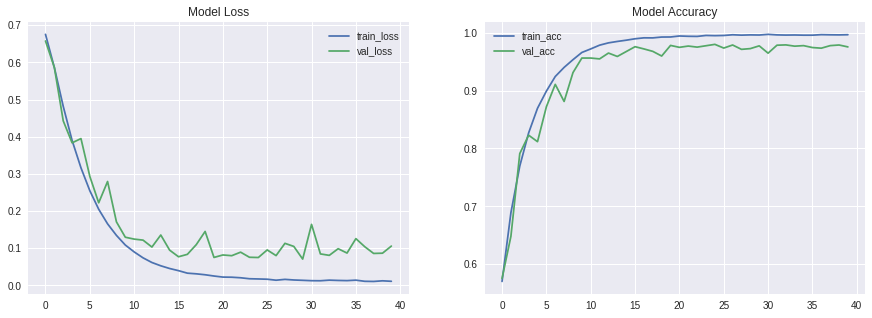

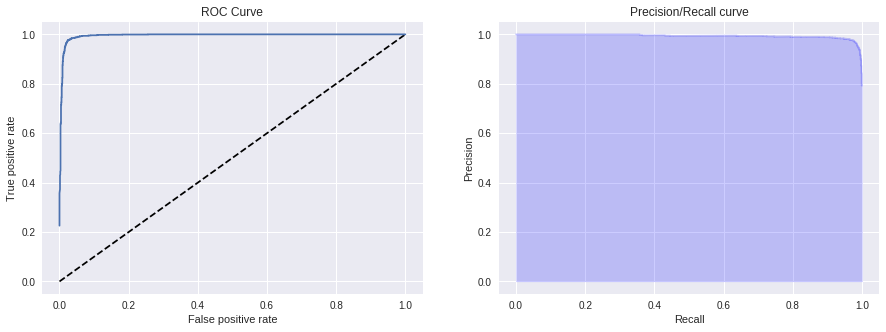

In [11]:
''' EVALUATE MODEL '''

from sklearn.metrics import roc_curve, precision_recall_curve, precision_score, recall_score, f1_score, accuracy_score
from sklearn.utils.fixes import signature

# calculate model test predictions
y_pred = model.predict(X_test)

# calculate necessary metrics
print('Model Accuracy = {:.3f}'.format(accuracy_score(y_test, y_pred.round()))) 
print('Model Precision = {:.3f}'.format(precision_score(y_test, y_pred.round()))) # how many of the frames it said were positive actually were
print('Model Recall = {:.3f}'.format(recall_score(y_test, y_pred.round())))  # how many of the breath onset frames in total the model managed to identify
print('Model F1 = {:.3f}'.format(f1_score(y_test, y_pred.round())))


''' PLOT LOSS & ACCURACY '''

fig, axs = plt.subplots(1,2,figsize=(15,5))

axs[0].plot(history.history['loss'],label='train_loss')
axs[0].plot(history.history['val_loss'],label='val_loss')
axs[0].legend()
axs[0].set_title('Model Loss')

axs[1].plot(history.history['acc'],label='train_acc')
axs[1].plot(history.history['val_acc'],label='val_acc')
axs[1].legend()
axs[1].set_title('Model Accuracy')

plt.show()
plt.close()



''' EVALUATE ROC CURVE '''

# calculate necessary metrics
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# plot ROC and precision/recall curve
fig,axs = plt.subplots(1,2,figsize=(15,5))

axs[0].plot([0, 1], [0, 1], 'k--')
axs[0].plot(fpr, tpr)
axs[0].set_xlabel('False positive rate')
axs[0].set_ylabel('True positive rate')
axs[0].set_title('ROC Curve')

step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters else {})
axs[1].step(recall, precision, color='b', alpha=0.2, where='post')
axs[1].fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
axs[1].set_xlabel('Recall')
axs[1].set_ylabel('Precision')
axs[1].set_title('Precision/Recall curve')

plt.show()
plt.close()

# 2D CNN & LSTM Model & Evaluation

In [22]:
''' BUILD 2D CONV & LSTM MODEL '''

from keras import models, layers, optimizers

model = models.Sequential()

# 2D Conv Layers
model.add(layers.Conv2D(32,(5,3),activation='relu',input_shape=(mel_slices_rebal_train[0].shape[0],mel_slices_rebal_train[0].shape[1],mel_slices_rebal_train[0].shape[2])))
model.add(layers.MaxPooling2D((3,1)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((3,3)))
model.add(layers.Dense(256, activation="relu"))

# LSTM Layers
model.add(layers.Reshape((-1,4))) # 4 is the output of the previous layer, n_mels
model.add(layers.LSTM(500,activation='relu',return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(100,activation='relu',return_sequences=False))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

model.compile(
    optimizer=optimizers.RMSprop(lr=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 51, 23, 32)        1472      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 23, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 7, 64)          0         
_________________________________________________________________
dense_5 (Dense)              (None, 5, 7, 256)         16640     
_________________________________________________________________
reshape_1 (Reshape)          (None, 2240, 4)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 2240, 500)         1010000   
__________

In [0]:
''' FIT MODEL '''

# choose to fit on imbalanced or balanced data
X_train = mel_slices_rebal_train
y_train = labels_rebal_train
X_val = mel_slices_rebal_val
y_val = labels_rebal_val
X_test = mel_slices_rebal_test
y_test = labels_rebal_test

history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_val,y_val), verbose=1)

In [0]:
''' TRAIN MODEL '''

history = model.fit(
        mel_slices_rebal_train,
        labels_rebal_train,
        batch_size=32,
        epochs = 75,
        validation_data = (mel_slices_rebal_val,labels_rebal_val),
        verbose=1)

In [0]:
''' EVALUATE MODEL '''

from sklearn.metrics import precision_score, recall_score, f1_score

# calculate model test predictions
y_pred = model.predict(X_test)

# calculate necessary metrics
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# precision is how many of the frames it said were breath onset actually were
print('Model Precision Score = {:.3f}'.format(precision_score(y_test, y_pred.round())))

# recall is how many of the breath onset frames in total the model managed to identify
# if recall is low, then it still needs to find more of the breath onsets. meaning we want to make the image better probably
print('Model Recall Score = {:.3f}'.format(recall_score(y_test, y_pred.round())))
print('Model F1 Score = {:.3f}'.format(f1_score(y_test, y_pred.round()))+' (best at 1)')



''' PLOT LOSS & ACCURACY '''

fig, axs = plt.subplots(1,2,figsize=(15,5))

axs[0].plot(history.history['loss'],label='train_loss')
axs[0].plot(history.history['val_loss'],label='val_loss')
axs[0].legend()
axs[0].set_title('Model Loss')

axs[1].plot(history.history['acc'],label='train_acc')
axs[1].plot(history.history['val_acc'],label='val_acc')
axs[1].legend()
axs[1].set_title('Model Accuracy')

plt.show()
plt.close()



''' EVALUATE ROC CURVE '''

from sklearn.metrics import roc_curve, precision_recall_curve, precision_score, recall_score, f1_score
from sklearn.utils.fixes import signature

# plot ROC and precision/recall curve
fig,axs = plt.subplots(1,2,figsize=(15,5))

axs[0].plot([0, 1], [0, 1], 'k--')
axs[0].plot(fpr, tpr)
axs[0].set_xlabel('False positive rate')
axs[0].set_ylabel('True positive rate')
axs[0].set_title('ROC Curve')

step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters else {})
axs[1].step(recall, precision, color='b', alpha=0.2, where='post')
axs[1].fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
axs[1].set_xlabel('Recall')
axs[1].set_ylabel('Precision')
axs[1].set_title('Precision/Recall curve')

plt.show()
plt.close()
